hi can you see this

In [1]:
from tme4 import *

In [2]:
# Génération des données
datax, datay = gen_arti(epsilon=0.1)
w = np.array([rd.randint(0,20) for i in range(datax.shape[1])])

# Dimensions
n, d = datax.shape
print('\nn =', n)
print('d =', d)

# Calcul du coût perceptron
print('\nCoût perceptron de dimensions:', perceptron_loss(w, datax, datay).shape )

# Calcul du gradient perceptron
print('Gradient perceptron de dimensions:', perceptron_grad(w, datax, datay).shape )


n = 1000
d = 2

Coût perceptron de dimensions: (1000, 1)
Gradient perceptron de dimensions: (1000, 2)


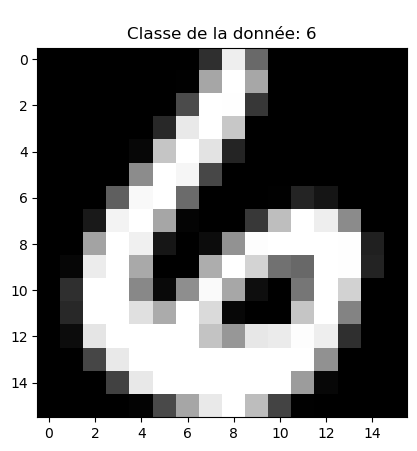

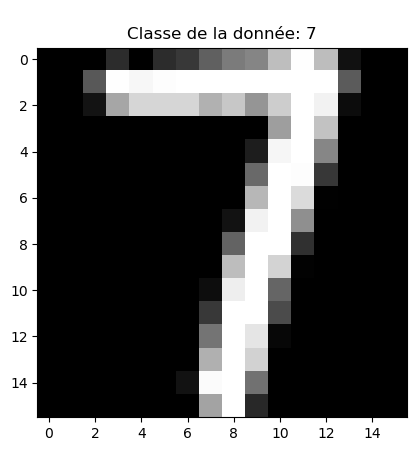

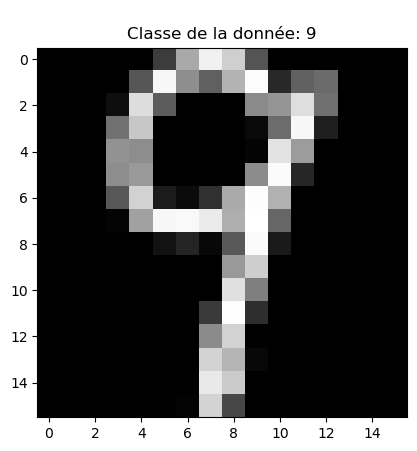

In [3]:
# Chargement des données USPS
alltrainx, alltrainy = load_usps( '../data/USPS_train.txt' )
alltestx, alltesty = load_usps( '../data/USPS_test.txt' )

# Visualisation de 3 données
for i in [0, 200, 750]:
    plt.figure()
    plt.title('\nClasse de la donnée: %d' % alltrainy[i])
    show_usps( alltrainx[i] )

In [4]:
# Chargement des données de la classe 6 (pos) et 9 (neg), puis mélange
xtrain, ytrain, xtest, ytest = split_data( 6, 9 )
xtrain, ytrain = shuffle_data(xtrain, ytrain)
xtest, ytest = shuffle_data(xtest, ytest)

# Création de notre modèle de perceptron
model = Lineaire(loss = perceptron_loss, loss_g = perceptron_grad)

# Phase d'entraînement
model.fit(xtrain, ytrain)

# Affichage du score (taux de bonne classification) en entraînement et en test
print('\n\nTaux de bonne classification sur les données train: ', model.score(xtrain, ytrain))
print('Taux de bonne classification sur les données test: ', model.score(xtest, ytest))



Taux de bonne classification sur les données train:  0.0
Taux de bonne classification sur les données test:  0.0


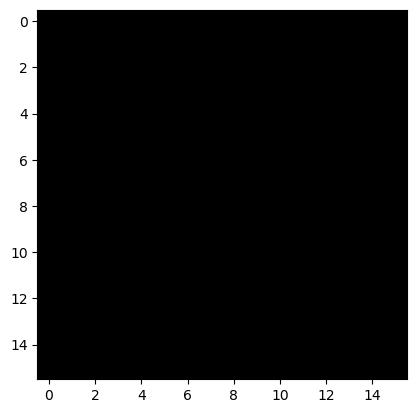

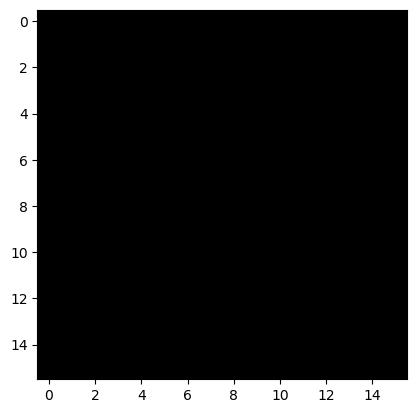

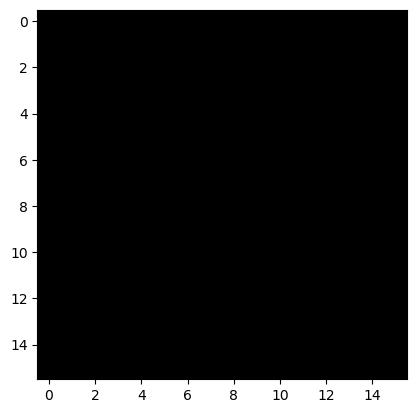

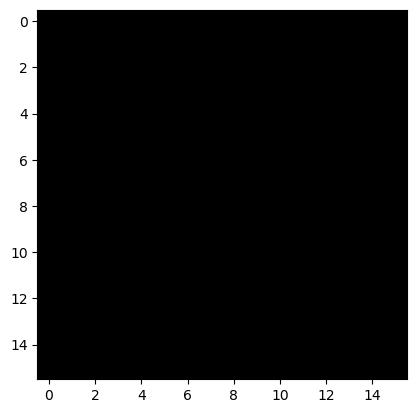

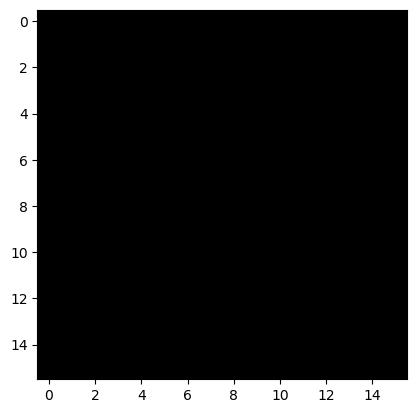

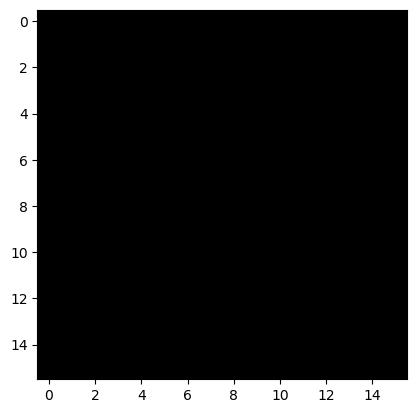

In [5]:
# Visualisation de la matrice de poids w au cours du temps
allw = model.getallw()

for i in range(len(allw)):
    if i%200 == 0:
        plt.figure()
        show_usps( np.array( allw[i] ) )

In [6]:
# Classe à isoler de toutes les autres
neg = 6

# Récupération des données de test et d'entraînement
xtrain, ytrain = load_usps('../data/USPS_train.txt')
xtest, ytest = load_usps('../data/USPS_test.txt')

# Mélange des données
xtrain, ytrain = shuffle_data(xtrain, ytrain)
xtest, ytest = shuffle_data(xtest, ytest)
    
# On remet les labels de la classe neg = 6 à -1 et ceux de la classe pos (le reste) à 1
ytrain = np.where(ytrain==neg, -1, ytrain)
ytrain = np.where(ytrain!=-1, 1, ytrain)
ytest = np.where(ytest==neg, -1, ytest)
ytest = np.where(ytest!=-1, 1, ytest)

In [7]:

# Création de notre modèle de perceptron
model = Lineaire(loss = perceptron_loss, loss_g = perceptron_grad)

# Phase d'entraînement
model.fit(xtrain, ytrain)

# Affichage du score (taux de bonne classification) en entraînement et en test
print('\n\nTaux de bonne classification sur les données train: ', model.score(xtrain, ytrain))
print('Taux de bonne classification sur les données test: ', model.score(xtest, ytest))



Taux de bonne classification sur les données train:  0.0
Taux de bonne classification sur les données test:  0.0


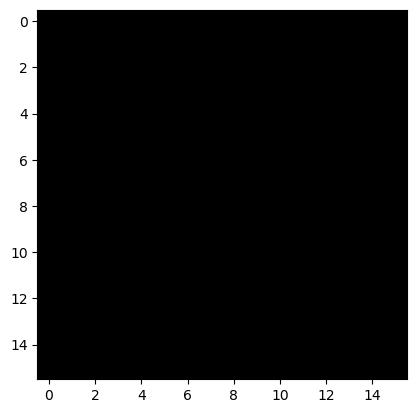

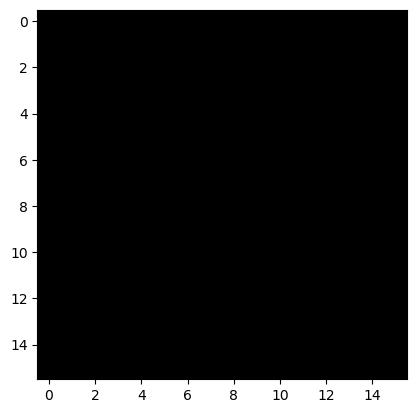

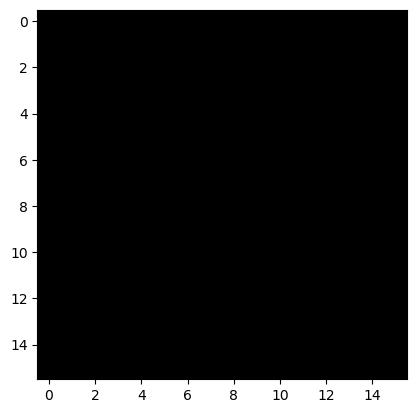

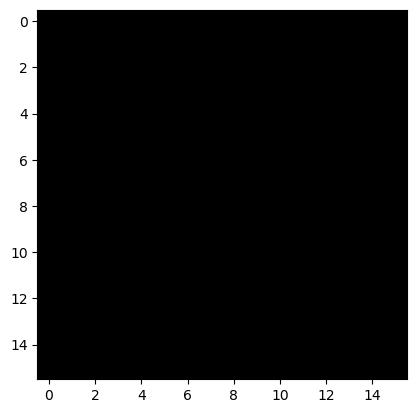

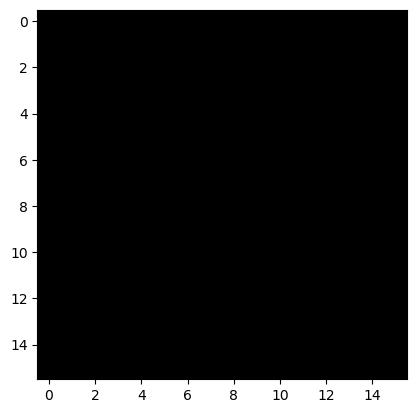

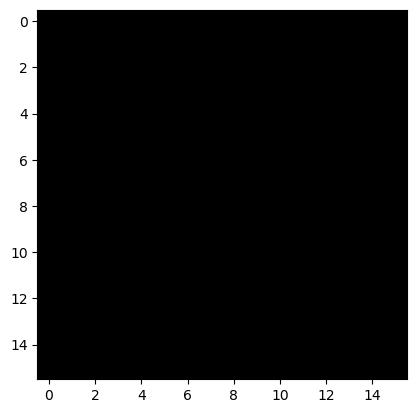

In [8]:
# Visualisation de la matrice de poids w au cours du temps
allw = model.getallw()

for i in range(len(allw)):
    if i%200 == 0:
        plt.figure()
        show_usps( np.array( allw[i] ) )



Taux de bonne classification sur les données train:  0.0
Taux de bonne classification sur les données test:  0.0


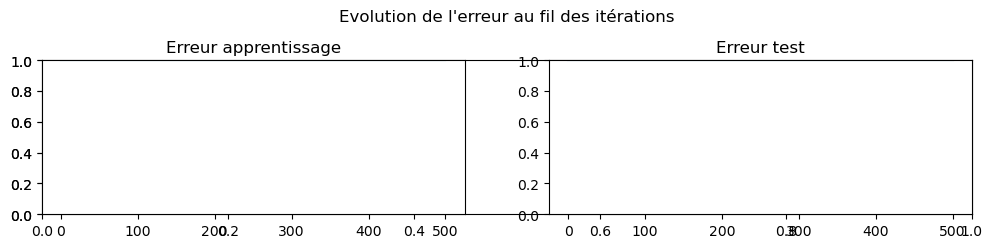

In [9]:
# Chargement des données de la classe 6 (pos) et 9 (neg), puis mélange
xtrain, ytrain, xtest, ytest = split_data( 6, 9 )
xtrain, ytrain = shuffle_data(xtrain, ytrain)
xtest, ytest = shuffle_data(xtest, ytest)

# Création de notre modèle de perceptron
model = Lineaire(loss = perceptron_loss, loss_g = perceptron_grad)

# Phase d'entraînement
model.fit(xtrain, ytrain)

# Affichage du score (taux de bonne classification) en entraînement et en test
print('\n\nTaux de bonne classification sur les données train: ', model.score(xtrain, ytrain))
print('Taux de bonne classification sur les données test: ', model.score(xtest, ytest))

# Traçage du courbe des erreurs en test et en apprentissage
showError( xtest, ytest, xtest, ytest, eps= 0.01, maxIter=500 )

ValueError: shape mismatch: value array of shape (0,256) could not be broadcast to indexing result of shape (0,)

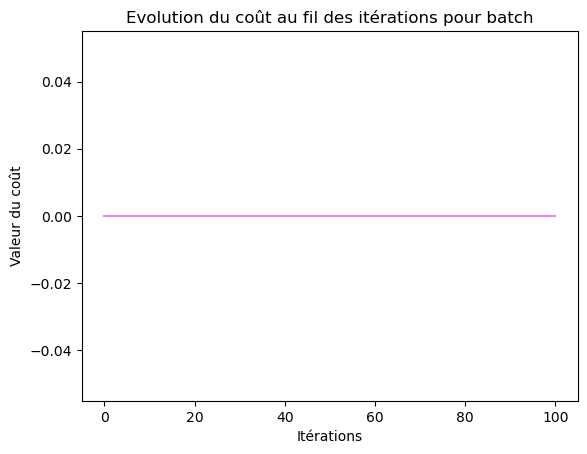

In [11]:
# Plot du coût perceptron au fil des itérations: descente de gradient batch
w, allw, allf = descente_gradient(xtrain, ytrain, perceptron_loss, perceptron_grad, eps=0.01, maxIter=100, descent='batch', mb = 10)
plt.figure()
plt.title('Evolution du coût au fil des itérations pour batch')
plt.xlabel('Itérations')
plt.ylabel('Valeur du coût')
plt.plot(allf, label = 'batch', color = 'violet')

# Descente de gradient stochastique
w, allw, allf = descente_gradient(xtrain, ytrain, perceptron_loss, perceptron_grad, eps=0.01, maxIter=10, descent='stochastique', mb = 10)
plt.figure()
plt.title('Evolution du coût au fil des itérations pour stochastique')
plt.xlabel('Itérations')
plt.ylabel('Valeur du coût')
plt.plot(allf, label = 'stochastique', color = 'khaki')

# Descente de gradient mini-batch
w, allw, allf = descente_gradient(xtrain, ytrain, perceptron_loss, perceptron_grad, eps=0.01, maxIter=10, descent='mini-batch', mb = 10)
plt.figure()
plt.title('Evolution du coût au fil des itérations pour mini-batch')
plt.xlabel('Itérations')
plt.ylabel('Valeur du coût')
plt.plot(allf, label = 'mini-batch', color = 'teal')

In [ ]:
# Test des fonctions de projection

datax = np.array([ [1,2,3],
                   [4,5,6],
                   [7,8,9],
                   [10,11,12] ])

print('Matrice à projeter :\n', datax)

# Projection polynomiale
print('\nProjection polynomiale: \n', proj_poly(datax))

# Projection biais
print('\nProjection biais: \n', proj_biais(datax))

Matrice à projeter :
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Projection polynomiale: 
 [[  1   1   2   3   2   4   6   3   6   9]
 [  1  16  20  24  20  25  30  24  30  36]
 [  1  49  56  63  56  64  72  63  72  81]
 [  1 100 110 120 110 121 132 120 132 144]]

Projection biais: 
 [[ 1.  1.  2.  3.]
 [ 1.  4.  5.  6.]
 [ 1.  7.  8.  9.]
 [ 1. 10. 11. 12.]]


In [ ]:
# Génération des données (1000 exemples suivant 4 gaussiennes)
xtrain, ytrain = gen_arti(epsilon=0.1, nbex=1000, data_type=1)
xtest, ytest = gen_arti(epsilon=0.1, nbex=1000, data_type=1)

# Création du modèle
model = Lineaire(loss = perceptron_loss, loss_g = perceptron_grad, proj = proj_poly)
model.fit(xtrain, ytrain)

# Traçage de lafrontière de décision et de l'évolution du coût pour les données train et test
main( xtrain, ytrain, xtest, ytest, proj=proj_poly, eps=0.01, maxIter=1000, descent='batch' )

NameError: name 'main' is not defined

In [ ]:
# Génération des données (1000 exemples suivant un échiquier)
xtrain, ytrain = gen_arti(epsilon=0.01, nbex=1000, data_type=2)
xtest, ytest = gen_arti(epsilon=0.01, nbex=1000, data_type=2)

# Création du modèle
model = Lineaire(loss = perceptron_loss, loss_g = perceptron_grad, proj = proj_poly)
model.fit(xtrain, ytrain)

# Traçage de lafrontière de décision et de l'évolution du coût pour les données train et test
main( xtrain, ytrain, xtest, ytest, proj=proj_poly, eps=0.01, maxIter=1000, descent='batch' )

NameError: name 'main' is not defined

In [ ]:
# Génération des données (1000 exemples suivant 4 gaussiennes)
xtrain, ytrain = gen_arti(epsilon=0.1, nbex=1000, data_type=1)
xtest, ytest = gen_arti(epsilon=0.1, nbex=1000, data_type=1)

# Création du modèle
model = Lineaire(loss = perceptron_loss, loss_g = perceptron_grad, proj = proj_poly)
model.fit(xtrain, ytrain)

# Traçage de lafrontière de décision et de l'évolution du coût pour les données train et test
main( xtrain, ytrain, xtest, ytest, proj=proj_poly, eps=0.01, maxIter=1000, descent='batch' )

NameError: name 'main' is not defined

In [ ]:
# Génération des données (1000 exemples suivant un échiquier)
xtrain, ytrain = gen_arti(epsilon=0.01, nbex=1000, data_type=2)
xtest, ytest = gen_arti(epsilon=0.01, nbex=1000, data_type=2)

# Création du modèle
model = Lineaire(loss = perceptron_loss, loss_g = perceptron_grad, proj = proj_poly)
model.fit(xtrain, ytrain)

# Traçage de lafrontière de décision et de l'évolution du coût pour les données train et test
main( xtrain, ytrain, xtest, ytest, proj=proj_poly, eps=0.01, maxIter=1000, descent='batch' )

NameError: name 'main' is not defined